<a href="https://colab.research.google.com/github/ldkmdcj/CI/blob/main/Fuzzy_Logic_Washingmachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 8.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=fd0770e8d92f109499d67cbbb69692f85909dda8805bd0038357fee2f5fefa80
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

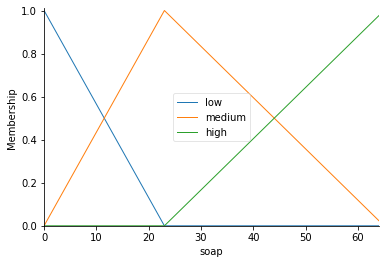

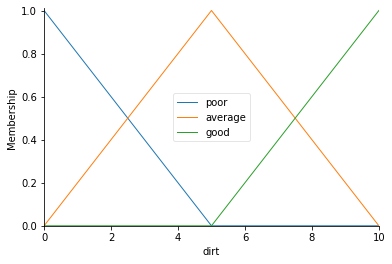

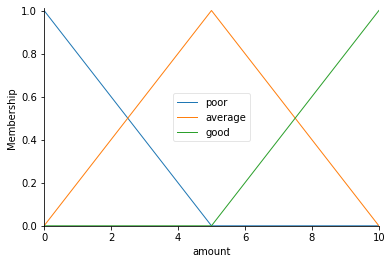

In [5]:
amount = ctrl.Antecedent(np.arange(0, 11, 1), 'amount')
dirt = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt')
soap = ctrl.Consequent(np.arange(0, 65, 1), 'soap')

amount.automf(3)
dirt.automf(3)

soap['low'] = fuzz.trimf(soap.universe, [0, 0, 23])
soap['medium'] = fuzz.trimf(soap.universe, [0, 23, 65])
soap['high'] = fuzz.trimf(soap.universe, [23, 65, 65])

soap.view()
dirt.view()
amount.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbab51dfe50>)

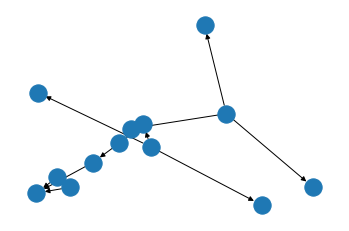

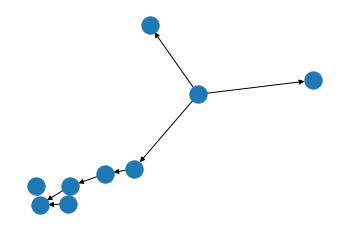

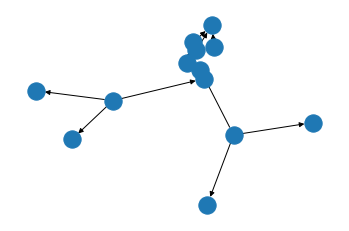

In [6]:
rule1 = ctrl.Rule(amount['poor'] | dirt['poor'], soap['low'])
rule2 = ctrl.Rule(dirt['average'], soap['medium'])
rule3 = ctrl.Rule(dirt['good'] | amount['good'], soap['high'])

rule1.view()
rule2.view()
rule3.view()

48.621808161372165


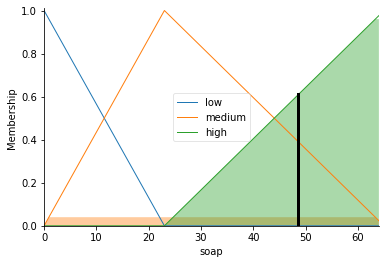

In [7]:
soap_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
washing = ctrl.ControlSystemSimulation(soap_ctrl)

washing.input['amount'] = 6.5
washing.input['dirt'] = 9.8

washing.compute()

print(washing.output['soap'])
soap.view(sim=washing)